In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_colwidth', 500)  # Display full text in columns


## Datasets

In [2]:
# Analyzing Political Bias and Unfairness in News Articles at Different Levels of Granularity
# Political Ideology and Polarization: A Multi-dimensional Approach

import json

with open("data/released_data.json", "r") as file:
    j_string = file.readline()
    jsons = []
    while j_string:
        data = json.loads(j_string)
        jsons.append(data)
        j_string = file.readline()
        
df = pd.DataFrame(jsons)

df_right_bias = df.loc[(df['allsides_bias'] == 'From the Right') & (df['adfontes_political'] == 'bias') & (df['adfontes_fair'] == 'bias')] 

df_left_bias = df.loc[(df['allsides_bias'] == 'From the Left') & (df['adfontes_political'] == 'bias') & (df['adfontes_fair'] == 'bias')] 

df.tail(6)


,source,title,event_id,adfontes_fair,adfontes_political,allsides_bias,content,misc
7769,Washington Times,PICKET: RNC's Priebus hits back at MSNBC's Matthews - 'He wants to be the biggest jerk in the room',0,bias,neutral,From the Right,"*UPDATE 8/29/12 - MSNBC’s Chris Matthews Responded to Chairman Priebus:\n“Nobody’s asked me to apologize,” said MSNBC’s Chris Matthews. “I was telling the truth…those ads are aimed at racial purpose,” he later added.","{'time': 'None', 'topics': 'Election: Presidential', 'author': ['Kerry Picket']}"
7770,Politico,Ann Romney's task: Humanize Mitt,0,bias,neutral,From the Left,"TAMPA, Fla. — Ann Romney will take to the podium here Tuesday night and try to accomplish what the sharpest minds in Republican politics have failed to do: present her stiff and awkward husband as a likable guy.\nHer speech is considered second in importance only to Mitt Romney’s and will set the tone for the week as the Republican Party presents its case for turning President Barack Obama out of office.\nStory Continued Below\nConvention and campaign officials see Ann Romney as the only per...","{'time': '2012-08-28 04:59:14', 'topics': 'Election: Presidential', 'author': ['LOIS ROMANO', 'Frida Ghitis', 'John A. Farrell', 'Jeff Greenfield', 'Cliff Sims']}"
7771,Washington Times,'Mittigator' to make case for Romney,0,bias,neutral,From the Right,"She is a gracious warrior with a kind face, a polished demeanor and the inner mettle of a survivor. Ann Romney has been called the secret weapon of her husband’s campaign, and he adores her: When Mitt Romney strides to the podium to introduce his wife of 43 years, he calls her “sweetheart.” She smiles. The crowd goes crazy.\nAnd why shouldn’t they? Though the Romneys could emerge as the nation’s No. 1 power couple, there is a certain authenticity about them, built over decades around family ...","{'time': 'None', 'topics': 'Election: Presidential', 'author': ['Jennifer Harper']}"
7772,Fox News,"Convention-bound Ryan slams Obama for presiding over 'debt, doubt and decline'",0,bias,bias,From the Right,"Republican VP pick on 'Special Report'\nMaking one last stop in his hometown before flying to Tampa for the official nomination to the Republican ticket, vice presidential pick Paul Ryan slammed the current White House for putting the nation down a road of ""debt, doubt and decline.""\nIn an interview with Fox News&apos Bret Baier, Ryan teed up his speech at the Republican National Convention by stressing that the weather-delayed event will nevertheless provide a critical opportunity to draw a...","{'time': '2012-08-27 00:00:00', 'topics': 'Election: Presidential', 'author': ['| Fox News']}"
7773,Politico,Ryan seeks comfort of Ron Paul fans,0,bias,neutral,From the Left,"Paul Ryan said Monday he expects Ron Paul supporters will come around to the Republican ticket and “should be very comfortable with us.”\nRyan told Fox News that he and Paul “see eye to eye on a lot of issues,” adding that he doesn’t feel there is any tension with Paul — who held his own rally in Tampa on Sunday and did not endorse Romney — or the Texas congressman’s supporters.\nStory Continued Below\n“So I think, in the final analysis, Ron is clearly going to — he and his supporters should...","{'time': '2012-08-27 15:52:45', 'topics': 'Election: Presidential', 'author': ['MACKENZIE WEINGER', 'Frida Ghitis', 'John A. Farrell', 'Jeff Greenfield', 'Cliff Sims']}"
7774,CNN (Web News),Paul to supporters: 2012 the start of a new era,0,bias,neutral,From the Left,"Tampa, Florida (CNN) \- As Rep. Ron Paul's third presidential bid is set to come to its formal end at the Republican National Convention, Paul sought to rally his loyal supporters with talk of a new era in American history.\n""I'm convinced that we're living at the end of an era,"" Paul told the crowd at a rally in honor of him and his libertarian political movement. ""The end of an era provides an opportunity,"" Paul added before laying out his view that an era in A

In [6]:
df_right_bias.sample(3)

,source,title,event_id,adfontes_fair,adfontes_political,allsides_bias,content,misc
4804,Fox News,Security Expert: My Fear is That More Churches Will be Targeted,0,bias,bias,From the Right,"South Carolina governor delivers emotional statement after Charleston church massacre\nThe gunman walked into the church sanctuary and opened fire.\nHe showed no mercy – firing more than 100 rounds and exploding a pipe bomb in the balcony. There was nowhere to hide from the carnage.\nClick here to follow Todd on Facebook for conservative conversation!\nSeven people died that night. Seven others were wounded.\nIt was Sept. 15, 1999 – the day a madman slaughtered Christians inside Wedgwood Bap...","{'time': '2015-06-18 00:00:00', 'topics': 'Violence in America', 'author': ['Todd Starnes', '| Fox News']}"
4321,Fox News,Turnout is name of the game in Iowa caucuses,0,bias,bias,From the Right,"The 2016 presidential contenders are begging their Iowa supporters to get to the caucuses Monday and Donald Trump, true to form, is in-your-face about it.\n""You&aposre from Iowa,"" Trump told a Dubuque crowd Saturday. ""Are you afraid of snow?""\nA snowfall forecast to start Monday night appeared more likely to hinder the hopefuls in their rush out of Iowa than the voters who will be flocking to the caucuses in the first contest of the presidential campaign.\nStill, there was every reason for c...","{'time': '2016-01-31 00:00:00', 'topics': 'Election: Presidential', 'author': ['| Associated Press']}"
4037,Newsmax,Ted Cruz Desperately Seeks to Stop Donald Trump in Indiana,0,bias,bias,From the Right,"Republican Ted Cruz faces a high-stakes test for his slumping presidential campaign in Tuesday's Indiana primary, one of the last opportunities for the Texas senator to halt Donald Trump's stunning march toward the GOP nomination. Cruz has spent the past week camped out in Indiana, securing the support of the state's governor and announcing retired technology executive Carly Fiorina as his running mate. Yet his aides were pessimistic heading into Tuesday's voting and were prepared for Cruz t...","{'time': '2016-05-03 06:42:00', 'topics': 'Election: Presidential', 'author': ['JULIE PACE and SCOTT BAUER']}"


In [7]:
csv_file = "data/toxicbias_train.csv"
df = pd.read_csv(csv_file)

# Display the DataFrame
df.sample(5)


,comment_text,identity_attack_x,bias,target,category,rationale
2552,At least no one died besides the shooter. I hope Trump bombs another Muslim country,0.873070,bias,muslims,religion,prejudice towards muslims
868,The niqab is a horrible symbol of womens oppression and for some reason it is only supported by the extreme right in Islam and by white liberals in the West.,0.500000,bias,"muslims,whites,liberals","religion,race,political",prejudice against muslims and white liberals
3431,Nothing is stopping the florist from exercising her freedom of speech by putting a hugh sign in her window WE DONT SERVE GAY WEDDINGS why doesnt she?,0.833333,bias,gays,lgbtq,prejudice towards gays
1936,Muslims innocent .. yeah .. like newborn baby rats.,0.795455,bias,muslims,religion,prejudice against muslims
698,Make no mistake. These are a part of the segment of Muslims who are Radical Extreme Muslim Terrorists. And radical extreme Muslim terrorists hate gays and take pleasure in killing them,0.787500,bias,muslims,religion,prejudice against muslims


## Model

In [88]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

def predict_nli_label(premise, hypothesis, NLImodel = 'cross-encoder/nli-deberta-base'):

    model = AutoModelForSequenceClassification.from_pretrained(NLImodel)
    tokenizer = AutoTokenizer.from_pretrained(NLImodel)

    features = tokenizer([premise], [hypothesis],  padding=True, truncation=True, return_tensors="pt")

    model.eval()
    with torch.no_grad():
        scores = model(**features).logits
        label_mapping = ['contradiction', 'neutral', 'entailment']
        labels = [label_mapping[score_max] for score_max in scores.argmax(dim=1)]

    return labels[0], scores.tolist()[0] 


In [103]:
# pose sequence as a NLI premise and label as a hypothesis
from transformers import AutoModelForSequenceClassification, AutoTokenizer
nli_model = AutoModelForSequenceClassification.from_pretrained('facebook/bart-large-mnli')
tokenizer = AutoTokenizer.from_pretrained('facebook/bart-large-mnli')

premise = 'The boy was outside.'
hypothesis = f'A boy was outside.'

# run through model pre-trained on MNLI
x = tokenizer.encode(premise, hypothesis, return_tensors='pt',
                     truncation_strategy='only_first')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
logits = nli_model(x.to(device))[0]

# we throw away "neutral" (dim 1) and take the probability of
# "entailment" (2) as the probability of the label being true 
entail_contradiction_logits = logits[:,[0,2]]
probs = entail_contradiction_logits.softmax(dim=1)
prob_label_is_true = probs[:,1]

print(entail_contradiction_logits)
print(probs)
print(prob_label_is_true)


/usr/local/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2399: FutureWarning: The `truncation_strategy` argument is deprecated and will be removed in a future version, use `truncation=True` to truncate examples to a max length. You can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to truncate to the maximal input size of the model (e.g. 512 for Bert).  If you have pairs of inputs, you can give a specific truncation strategy selected among `truncation='only_first'` (will only truncate the first sentence in the pairs) `truncation='only_second'` (will only truncate the second sentence in the pairs) or `truncation='longest_first'` (will iteratively remove tokens from the longest sentence in the pairs).
  warnings.warn(


tensor([[-3.6310,  4.8785]], grad_fn=<IndexBackward0>)
tensor([[2.0150e-04, 9.9980e-01]], grad_fn=<SoftmaxBackward0>)
tensor([0.9998], grad_fn=<SelectBackward0>)


In [3]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification", model='cross-encoder/nli-deberta-base')

sent = "Hey he hates Asians too Apparently successful minorities get under the loony lefts skin."
candidate_labels = ["Prejudice", "Wealth", "Income"]
res = classifier(sent, candidate_labels)
print(res)

{'sequence': 'Hey he hates Asians too Apparently successful minorities get under the loony lefts skin.', 'labels': ['Wealth', 'Prejudice', 'Income'], 'scores': [0.382228285074234, 0.3719187080860138, 0.245852991938591]}


## Test examples

In [37]:
premise = "Hey he hates Asians too Apparently successful minorities get under the loony lefts skin."
hypothesis = "Prejudice towards individuals based on geographic location."

predict_nli_label(premise,hypothesis)

('neutral', [-1.519162893295288, -0.20995476841926575, 1.3938082456588745])

In [34]:
premise = "Intolerant liberals here calling others intolerant. Liberalism is a mental disorder. The sooner we rub it out of Western culture the better."
hypothesis = "Dislike, hatred, or prejudice against a political group, in particular liberals."

predict_nli_label(premise,hypothesis)

('entailment', [-3.1031978130340576, 1.9444491863250732, 0.7191958427429199])

In [35]:
premise = "Its bad enough we already have all these American sickos living in this country shooting up theatre schools churches malls etc. we dont have room for crazy muslims."
hypothesis = "Dislike, hatred or prejudice towards individuals of a race."

predict_nli_label(premise,hypothesis)

('entailment', [-1.6237410306930542, 1.1280356645584106, 0.0267395731061697])

In [33]:
premise = "where is our vocal feral cat killing muslim to defend his fellow islamist? must be hiding under his blow up sheep."
hypothesis = "Dislike, hatred, or prejudice towards individuals who are muslim."

predict_nli_label(premise,hypothesis)

('entailment', [-1.1952913999557495, 0.5450257062911987, 0.3316133916378021])

In [32]:
premise = "where is our vocal feral cat killing muslim to defend his fellow islamist? must be hiding under his blow up sheep."
hypothesis = "Love or positive feelings towards individuals who are muslim."
predict_nli_label(premise,hypothesis)

('contradiction',
 [1.3223092555999756, -0.9107821583747864, -0.4003891348838806])

In [15]:
premise1 = "Islam frightens me when I think of my daughters future in an islamized Canada."
premise2= "This is not an irrational fear not a phobia when you look at whats happening in the world today."
hypothesis = "Dislike, hatred or prejudice towards individuals who are muslim."
hypothesis_New = "Negative feelings towards islam."

predict_nli_label(premise1,hypothesis_New)
predict_nli_label(premise2,hypothesis_New)

tensor([[-1.5974,  1.0171,  0.1459]])
['entailment']
tensor([[ 0.4719, -2.0669,  1.2745]])
['neutral']


In [16]:
premise = "Islam frightens me when I think of my daughters future in an islamized Canada. This is not an irrational fear not a phobia when you look at whats happening in the world today."
hypothesis = "Negative view of individuals who are muslim."

predict_nli_label(premise,hypothesis)

tensor([[ 1.1562, -1.3025,  0.0457]])
['contradiction']


In [17]:
premise = "Islam frightens me when I think of my daughters future in an islamized Canada. This is not an irrational fear not a phobia when you look at whats happening in the world today."
hypothesis = "Fear of individuals who are protestant."

predict_nli_label(premise,hypothesis)

tensor([[-0.0936, -0.1933,  0.1388]])
['neutral']


In [41]:
premise = "Great. Catholics are on the winning side and the country as a whole loses. Whats not to love? Make America hate again."
hypothesis = "Derogatory negative opinion against individuals"

predict_nli_label(premise,hypothesis)

('entailment', [-1.183259129524231, 0.4223703444004059, 0.39567989110946655])

## Initial testing 

Using exisiting rationale from dataset to see if model gives similar results

In [10]:
unique_values = df['bias'].unique()
print(unique_values)

['bias' 'neutral']


In [9]:

def add_nli_predictions(df, model):
    predicted_labels = []
    predicted_scores = []

    for _, row in df.iterrows():
        comment_text = row['comment_text']

        if row['bias'] == 'neutral' or pd.isna(row['rationale']):
            rationale = "Bias or prejudice in the text."
        else:
            rationale = row['rationale']

        label, scores = predict_nli_label(comment_text, rationale, model)

        predicted_labels.append(label)
        predicted_scores.append(scores)

    df = df.copy()  # Create a copy of the DataFrame
    df['predicted_label'] = predicted_labels
    df['predicted_scores'] = predicted_scores

    return df


### Compare models (Roberta base, deberta, bart)

In [7]:
csv_file = "data/test/toxicbias3.csv"

df = pd.read_csv(csv_file)

# df_roberta_base = add_nli_predictions(df, 'roberta-base')
# df_deberta = add_nli_predictions(df, "cross-encoder/nli-deberta-base")
df_bart_large = add_nli_predictions(df, "facebook/bart-large-mnli")

Unnamed: 0                                                                                                                                                                                                                   2162
comment_text         Black and Brown People still own millions of Black and Brown slaves. They castrate them rape them and even kill them.  So who are you calling a supremacist white nationalist or racist. Little Brown woman?
identity_attack_x                                                                                                                                                                                                         0.90651
bias                                                                                                                                                                                                                         bias
target                                                                                          

In [27]:
# save result to csv
# df_roberta_base.to_csv('results/NEW_roberta_base1000.csv')
# df_deberta.to_csv('results/NEW_deberta1000.csv')
# df_bart_large.to_csv('results/split/bart_part3.csv')


## Compare accuracy

In [51]:
df_roberta_base = pd.read_csv('results/roberta_base1000.csv')
df_deberta = pd.read_csv('results/deberta1000.csv')
df_bart_large = pd.read_csv('results/bart1000.csv')

df_roberta_base_new = pd.read_csv('results/NEW_roberta_base1000.csv')
df_deberta_new = pd.read_csv('results/NEW_deberta1000.csv')
df_bart_large_new = pd.read_csv('results/NEW_bart1000.csv')

(2561, 899, 784, 83)

In [119]:
def model_accuracy(df):

    bias_correct_predictions = 0
    bias_incorrect_predictions = 0
    neutral_correct_predictions = 0
    neutral_incorrect_predictions = 0

    for _, row in df.iterrows():
        if row['bias'] == 'bias':
            if row['predicted_label'] == 'entailment':
                bias_correct_predictions += 1
            elif row['predicted_label'] in ['neutral', 'contradiction']:
                bias_incorrect_predictions += 1

        elif row['bias'] == 'neutral':
            if row['predicted_label'] in ['neutral', 'contradiction']:
                neutral_correct_predictions += 1
            elif row['predicted_label'] == 'entailment':
                neutral_incorrect_predictions += 1

    return (
        bias_correct_predictions,
        bias_incorrect_predictions,
        neutral_correct_predictions,
        neutral_incorrect_predictions
    )

In [120]:
dfs = {
    # 'roberta-base': df_roberta_base,
    # 'deberta': df_deberta,
    # 'bart-large': df_bart_large,
    # 'roberta-base_new': df_roberta_base_new,
    # 'deberta_new': df_deberta_new,
    # 'bart-large_new': df_bart_large_new,
    'bart-large_final' : df_fin
}

accuracy_results = {}

for model, data in dfs.items():
    bias_correct, bias_incorrect, neutral_correct, neutral_incorrect = model_accuracy(data)
    accuracy = (bias_correct + neutral_correct) / (bias_correct + neutral_correct + bias_incorrect + neutral_incorrect)
    
    accuracy_results[model] = {
        'bias_correct': bias_correct,
        'bias_incorrect': bias_incorrect,
        'neutral_correct': neutral_correct,
        'neutral_incorrect': neutral_incorrect,
        'accuracy': accuracy * 100
    }

# Print or use the stored results as needed
for model, results in accuracy_results.items():
    print(f"Results for {model}:")
    print(f"Number of correct bias predictions: {results['bias_correct']}")
    print(f"Number of correct neutral predictions: {results['neutral_correct']}\n")
    print(f"Number of incorrect bias predictions: {results['bias_incorrect']}")
    print(f"Number of incorrect neutral predictions: {results['neutral_incorrect']}\n")
    print(f"Model accuracy: {results['accuracy']}%")

Results for bart-large_final:
Number of correct bias predictions: 2561
Number of correct neutral predictions: 784

Number of incorrect bias predictions: 899
Number of incorrect neutral predictions: 83

Model accuracy: 77.30529235035822%


In [118]:
accuracy_results['bart-large_final']

{'bias_correct': 673,
 'bias_incorrect': 2787,
 'neutral_correct': 98,
 'neutral_incorrect': 769,
 'accuracy': 17.81834989600185}

In [36]:
bias_subset = df_fin[df_fin['bias'] == 'bias']
bias_value_counts = bias_subset['predicted_label'].value_counts()

neutral_subset = df_fin[df_fin['bias'] == 'neutral']
neutral_value_counts = neutral_subset['predicted_label'].value_counts()

In [37]:
print(bias_value_counts)
print(neutral_value_counts)

entailment       2561
neutral           673
contradiction     226
Name: predicted_label, dtype: int64
neutral          769
entailment        83
contradiction     15
Name: predicted_label, dtype: int64


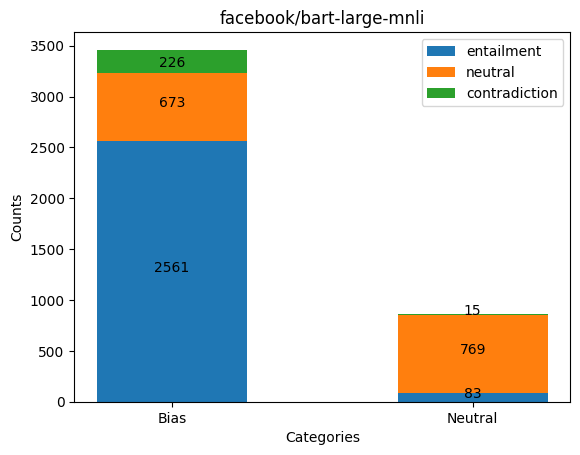

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Bias', 'Neutral']
entailment = [bias_value_counts['entailment'], neutral_value_counts['entailment']]
neutral = [bias_value_counts['neutral'], neutral_value_counts['neutral']]
contradiction = [bias_value_counts['contradiction'], neutral_value_counts['contradiction']]

# Plotting
bar_width = 0.5
bar_positions = np.arange(len(categories))

# Create the stacked bars
plt.bar(bar_positions, entailment, width=bar_width, label='entailment')
plt.bar(bar_positions, neutral, bottom=entailment, width=bar_width, label='neutral')
plt.bar(bar_positions, contradiction, bottom=np.add(entailment, neutral), width=bar_width, label='contradiction')

plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('facebook/bart-large-mnli')
plt.legend()

# Add text annotations inside the bars
for i in range(len(categories)):
    plt.text(bar_positions[i], entailment[i] / 2, str(entailment[i]), ha='center', color='black')
    plt.text(bar_positions[i], entailment[i] + neutral[i] / 2, str(neutral[i]), ha='center', color='black')
    plt.text(bar_positions[i], entailment[i] + neutral[i] + contradiction[i] / 4, str(contradiction[i]), ha='center', color='black')

plt.xticks(bar_positions, categories)
plt.show()


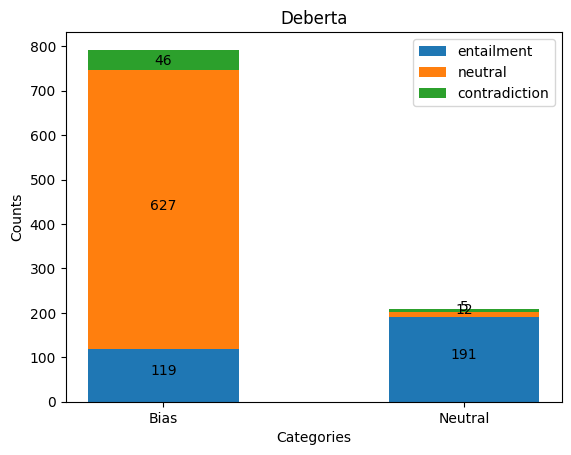

In [69]:
df_deberta_new = pd.read_csv('results/NEW_deberta1000.csv')

bias_subset = df_deberta_new[df_deberta_new['bias'] == 'bias']
bias_value_counts = bias_subset['predicted_label'].value_counts()

neutral_subset = df_deberta_new[df_deberta_new['bias'] == 'neutral']
neutral_value_counts = neutral_subset['predicted_label'].value_counts()

import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Bias', 'Neutral']
entailment = [bias_value_counts['entailment'], neutral_value_counts['entailment']]
neutral = [bias_value_counts['neutral'], neutral_value_counts['neutral']]
contradiction = [bias_value_counts['contradiction'], neutral_value_counts['contradiction']]

# Plotting
bar_width = 0.5
bar_positions = np.arange(len(categories))

# Create the stacked bars
plt.bar(bar_positions, entailment, width=bar_width, label='entailment')
plt.bar(bar_positions, neutral, bottom=entailment, width=bar_width, label='neutral')
plt.bar(bar_positions, contradiction, bottom=np.add(entailment, neutral), width=bar_width, label='contradiction')

plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Deberta')
plt.legend()

# Add text annotations inside the bars
for i in range(len(categories)):
    plt.text(bar_positions[i], entailment[i] / 2, str(entailment[i]), ha='center', color='black')
    plt.text(bar_positions[i], entailment[i] + neutral[i] / 2, str(neutral[i]), ha='center', color='black')
    plt.text(bar_positions[i], entailment[i] + neutral[i] + contradiction[i] / 4, str(contradiction[i]), ha='center', color='black')

plt.xticks(bar_positions, categories)
plt.show()


## Visualizations

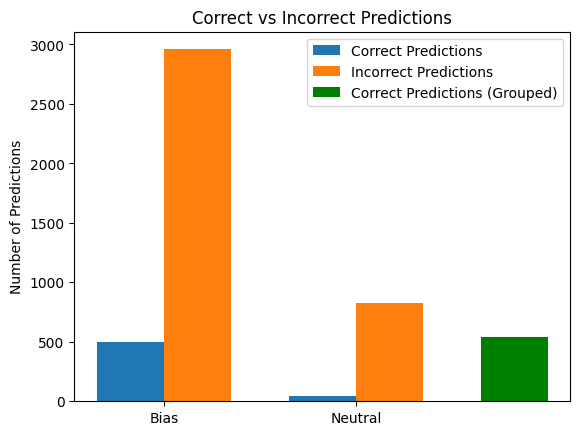

In [226]:
import matplotlib.pyplot as plt

labels = ['Bias', 'Neutral']
correct_predictions = [bias_correct_predictions, neutral_correct_predictions]
incorrect_predictions = [bias_incorrect_predictions, neutral_incorrect_predictions]

x = range(len(labels))

fig, ax = plt.subplots()
bar_width = 0.35

rects1 = ax.bar(x, correct_predictions, bar_width, label='Correct Predictions')
rects2 = ax.bar([i + bar_width for i in x], incorrect_predictions, bar_width, label='Incorrect Predictions')

ax.set_ylabel('Number of Predictions')
ax.set_title('Correct vs Incorrect Predictions')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

# Grouping correct predictions
total_correct_predictions = sum(correct_predictions)
ax.bar(len(labels), total_correct_predictions, bar_width, label='Correct Predictions (Grouped)', color='green')

plt.legend()
plt.show()


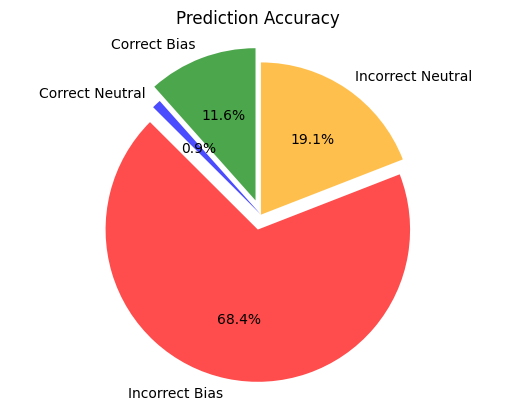

In [162]:
import matplotlib.pyplot as plt

# Create a pie chart
labels = ['Correct Bias', 'Correct Neutral', 'Incorrect Bias', 'Incorrect Neutral']
sizes = [bias_correct_predictions, neutral_correct_predictions, bias_incorrect_predictions, neutral_incorrect_predictions]
colors = ['green', 'blue', 'red', 'orange']
explode = (0.1, 0, 0.1, 0)  # Explode the slices

fig, ax = plt.subplots()
pie = ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Set opacity for colors
for patch in pie[0]:
    patch.set_alpha(0.7)

# Add title
ax.set_title('Prediction Accuracy')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Display the chart
plt.show()

## Testing neutral 

In [315]:
messages = [
    "The capital of France is Paris.",
    "Water boils at 100 degrees Celsius.",
    "The Earth revolves around the Sun.",
    "Photosynthesis is the process by which plants convert sunlight into energy.",
    "The chemical formula for water is H2O.",
]

hypothesis1 = "Bias or prejudice in the text."
hypothesis2 = "Prejudice or partiality towards a particular group or viewpoint."
hypothesis3 = "No bias or prejudice in the text."
hypothesis4 = "No prejudice or partiality towards a particular group or viewpoint."

results = {}
for message in messages:
    results[message] = [
        predict_nli_label(message, hypothesis1, 'facebook/bart-large-mnli'), 
        predict_nli_label(message, hypothesis2, 'facebook/bart-large-mnli'),
        predict_nli_label(message, hypothesis3, 'facebook/bart-large-mnli'),
        predict_nli_label(message, hypothesis4, 'facebook/bart-large-mnli')
    ]


In [312]:
messages = [
    "I hate everyone who is not white, WHITE POWER!",
    "Arabs are ruining everything, we should kick them out ",
    "The only good thing blacks are good at is shooting innocent kids",
    "Send those filthy immigrants back home, AMERICA first.",
]

hypothesis1 = "Bias or prejudice"
hypothesis2 = "Prejudice or partiality towards a particular group or viewpoint."
hypothesis3 = "No bias or prejudice"
hypothesis4 = "No prejudice or partiality towards a particular group or viewpoint."

results = {}
for message in messages:
    results[message] = [
        predict_nli_label(message, hypothesis1, 'facebook/bart-large-mnli'), 
        predict_nli_label(message, hypothesis2, 'facebook/bart-large-mnli'),
        predict_nli_label(message, hypothesis3, 'facebook/bart-large-mnli'),
        predict_nli_label(message, hypothesis4, 'facebook/bart-large-mnli')
    ]


In [316]:
for message, predictions in results.items():
    print(f"Results for '{message}':")
    for i, prediction in enumerate(predictions):
        label, scores = prediction
        print(f"Hypothesis {i+1}: {label}")
        print(f"Scores: {scores}")
        print()

Results for 'The capital of France is Paris.':
Hypothesis 1: neutral
Scores: [-0.05118773877620697, 0.4554246962070465, 0.583615243434906]

Hypothesis 2: neutral
Scores: [-0.23963893949985504, 0.03641188144683838, 0.044209808111190796]

Hypothesis 3: contradiction
Scores: [1.851564645767212, 1.41283118724823, -2.9412224292755127]

Hypothesis 4: contradiction
Scores: [2.528538942337036, 0.43362775444984436, -2.8043265342712402]

Results for 'Water boils at 100 degrees Celsius.':
Hypothesis 1: contradiction
Scores: [0.5664500594139099, 0.3469386398792267, -0.014243487268686295]

Hypothesis 2: entailment
Scores: [0.06760282069444656, 0.1568906158208847, -0.3774451017379761]

Hypothesis 3: contradiction
Scores: [2.16416597366333, 0.9189963936805725, -2.5509583950042725]

Hypothesis 4: contradiction
Scores: [2.062148332595825, 0.29212456941604614, -2.369100332260132]

Results for 'The Earth revolves around the Sun.':
Hypothesis 1: contradiction
Scores: [0.5732293725013733, 0.329851865768432

In [85]:
# get unique set of rationales
df_fin['rationale'].unique()

array(['prejudice against white men', 'prejudice against muslims',
       'prejudice against blacks', 'prejudice against islam',
       'prejudice against whites', nan, 'prejudice against christians',
       'prejudice towards blacks', 'prejudice towards gays',
       'prejudice against blacks and musims and towards whites',
       'prejudice against russians', 'prejudice against transgenders',
       'prejudice against lefts',
       'prejudice against left wing and muslims',
       'prejudice against gays', 'prejudice against christians and gays',
       'prejudice against asians and muslims',
       'prejudice against blacks and towards whites',
       'prejudice against whites and indians',
       'prejudice against liberals', 'prejudice against',
       'prejudice against muslims and towards chinese',
       'prejudice against republicans', 'prejudice towards christians',
       'prejudice against lesbians', 'prejudice against feminists',
       'prejudice against whitess',
      

## Tinkering with hypothesis and premise

In [234]:
df_bart_large_new[df_bart_large_new['predicted_label'] == 'co']
df_bart_large_new.sample(10)

,Unnamed: 0,Unnamed: 0.1,comment_text,identity_attack_x,bias,target,category,rationale,predicted_label,predicted_scores
716,716,2576,what if hes not old? Can he sew based on his being white? or male?,0.500000,neutral,NaN,none,NaN,neutral,"[-2.839334726333618, 1.3392512798309326, 1.936112880706787]"
900,900,517,Looks like a bunch of fat old white folks out for a march. And what is with the dude in the black helmet respirator and superhero shield? Pathetic.,0.590909,neutral,NaN,none,NaN,neutral,"[-2.975454092025757, 1.3704737424850464, 2.072193145751953]"
25,25,2276,The Dems are just the lesser of 2 evils. The GOP elected a bigot and racist president. What has the GOP done for black folks since the 1960s? When ever I forget that Im black some white person always reminds me that Im black.,0.653333,bias,whites,race,prejudice against whites,entailment,"[-0.20237302780151367, 1.4207251071929932, -1.248955249786377]"
893,893,3043,They are so full of it they were never going to visit anyways now they think they are going to make Trump feel bad go back to your coke snorting and closeted gay sex boys,0.587500,bias,gays,lgbtq,prejudice against gays,neutral,"[-2.1402523517608643, 1.3139210939407349, 1.494579792022705]"
141,141,4322,I dont think Asians are more resourceful than Africans is the correct diagnosis. Asia had a very different set of conditions in place before any colonialism which meant it was better placed to rebound afterwards.,0.500000,bias,"asians,africans",race,prejudice against asians and africans,entailment,"[0.5365539789199829, 1.7771034240722656, -1.2384419441223145]"
849,849,3124,Christopher history reminds us that you cant talk about equity or equality without talking about decades of free labor which built the financial infrastructure. White Adventists who are complicit in the structural and institutional racism and who benefit from it like most White Americans need to step up and challenge the evils that persist in the country and in the Adventist Church. Thanks for your perspective.,1.000000,bias,whites,race,prejudice against whites,entailment,"[-1.0225396156311035, 1.934458613395691, 0.0945172905921936]"
695,695,748,Its a given that out of 150000 muslim immigrants a certain number will be terrorists.,0.833333,bias,muslims,religion,prejudice against muslims,entailment,"[-0.6682076454162598, 1.8851962089538574, -0.6720868349075317]"
916,916,811,When Black people fly the confederate flag is it still qualified as supporting racism your thoughts Gary ?,0.600000,bias,blacks,race,prejudice against blacks,neutral,"[-3.1095900535583496, 1.1269792318344116, 2.222885847091675]"
183,183,3367,The greedy chinese are depleting everything on earth and enjoying every minute of it.,0.500000,bias,chinese,race,prejudice against chinese,entailment,"[-2.2349348068237305, 2.5432820320129395, 0.5111067295074463]"
474,474,3116,Bunch of kneeling illiterates squatting on a lie while black on black killings continue at record levels in cities,0.500000,bias,blacks,race,prejudice against blacks,entailment,"[-2.193145751953125, 1.6619800329208374, 1.0733790397644043]"


### Examples showing the impact of wording of hypothesis

In [233]:
premise = "Theres little difference between Muslim terrorists and Israeli terrorists."
hypothesis = "Bias or prejudice against israelis, muslims"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('contradiction',
 [1.1538724899291992, 1.0089519023895264, -1.2281742095947266])

In [286]:
premise = "Theres little difference between Muslim dogs and Israeli dogs."
hypothesis = "Bias or prejudice against israelis and muslims"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('entailment', [0.4007895290851593, 1.131015419960022, -0.9698682427406311])

### Examples of atomisation

Example 1: marked neutral initially

In [100]:
premise = "NO NO NO NO NO You cannot call Muslims innocent and nothing to so with terrorism then not do the same here. We will speak out harshly against Islam. Arrest me now scum Pay me later for breaching my speech rights.	"
hypothesis = "prejudice against muslims	"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('entailment', [-1.4833273887634277, -0.026008237153291702, 1.884655475616455])

In [99]:
premise = "NO NO NO NO NO You cannot call Muslims innocent and nothing to so with terrorism then not do the same here."
hypothesis = "prejudice against muslims	"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('entailment', [-1.2644469738006592, 0.20070520043373108, 1.3086400032043457])

In [298]:
premise = "We will speak out harshly against Islam."
hypothesis = "prejudice against muslims"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('neutral', [-2.393953800201416, 0.7602177262306213, 2.2532169818878174])

In [299]:
premise = "Arrest me now scum Pay me later for breaching my speech rights."
hypothesis = "prejudice against muslims"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('entailment', [-0.9653019905090332, 4.0350165367126465, -1.7184970378875732])

Example 2: marked neutral originially

In [190]:
premise = "A suspected Islamist?? Thats an inaccurate description and will soon be a banned word as it is Islamophobic. We are not to talk about Islam Justin says so. Ah geez sorry Alceste I mentioned Islam. This post to disappear shortly.	"
hypothesis = "prejudice against muslims"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('neutral', [-2.690321207046509, 0.20049217343330383, 2.691774845123291])

In [195]:
premise = "A suspected Islamist??"
hypothesis = "prejudice against muslims"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('entailment', [0.1728627234697342, 0.4996832311153412, -0.4560590982437134])

In [307]:
premise = "Thats an inaccurate description and will soon be a banned word as it is Islamophobic."
hypothesis = "prejudice against muslims"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('neutral', [-2.543168544769287, 0.6502559185028076, 2.4211270809173584])

In [196]:
premise = "We are not to talk about Islam Justin says so."
hypothesis = "prejudice against muslims"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('entailment', [-0.9334355592727661, 1.732102632522583, -0.2891322374343872])

In [197]:
premise = "Ah geez sorry Alceste I mentioned Islam. This post to disappear shortly."
hypothesis = "prejudice against muslims"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('contradiction', [1.6803958415985107, 1.114214301109314, -2.2965805530548096])

Example 3: marked contradiction originially

In [203]:
premise = "...we do allow our white domestic terrorists to walk around in public armed. Lets not discriminate here. We also allow Muslim terrorists to walk around and drive around armed. How else would they arrive at the location theyve chosen prepared for their murderous deeds?	"
hypothesis = "prejudice against muslims and whites	"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('contradiction',
 [1.5307340621948242, -0.6096659898757935, -0.7171313166618347])

In [207]:
premise = "...we do allow our white domestic terrorists to walk around in public armed."
hypothesis = "prejudice against muslims and whites"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('entailment', [0.8523672223091125, 1.3388031721115112, -1.2235276699066162])

In [232]:
premise = "Lets not discriminate here."
hypothesis = "prejudice against muslims and whites"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('entailment', [0.261341392993927, 2.901933193206787, -2.2467544078826904])

In [212]:
premise = "We also allow Muslim terrorists to walk around and drive around armed."
hypothesis = "prejudice against muslims and whites"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('entailment', [-0.41969287395477295, 2.004979133605957, -0.7019047141075134])

In [221]:
premise = "How else would they arrive at the location theyve chosen prepared for their murderous deeds?"
hypothesis = "prejudice against muslims and whites"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('entailment', [-0.9712803363800049, 3.7575583457946777, -1.217695951461792])

## Issues with bart model

Example 1

In [57]:
premise = "The teenager, who cannot be named for legal reasons, also admitted five terror offences, police said."
hypothesis = "Prejudice or bias against muslims"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('entailment', [0.29532966017723083, 1.6984502077102661, -1.1082813739776611])

In [61]:
premise = "The teenager, who cannot be named for legal reasons, also admitted five car offences, police said."
hypothesis = "Prejudice or bias against muslims"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('entailment', [-0.5969671010971069, 3.142813205718994, -1.6399071216583252])

In [84]:
premise = "The teenager who cannot be named also admitted to being tired while driving."
hypothesis = "Prejudice in favour of greeks"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('entailment', [0.3095209300518036, 1.4472826719284058, -1.3026847839355469])

In [83]:
premise = "The teenager, who cannot be named for legal reasons, also admitted five terror offences, police said."
hypothesis = "The police was arresting a teenager"
predict_nli_label(premise,hypothesis, 'cross-encoder/nli-deberta-base')

('contradiction',
 [1.0923528671264648, -1.7041794061660767, 0.4700973629951477])

Example 2

In [98]:
premise = "Russian terrorists once again confirm their status of fighters against everything humane and honest"
hypothesis = "Prejudice or bias against Russians"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('neutral', [-1.5309932231903076, 2.1342973709106445, -0.1567661166191101])

In [90]:
premise = "Russian terrorists once again confirm their status of fighters against everything humane and honest"
hypothesis = "Prejudice or bias against whites and muslims"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('neutral', [-0.3534943759441376, 2.0039029121398926, -0.6138737201690674])

In [91]:
premise = "Russian terrorists once again confirm their status of fighters against everything humane and honest"
hypothesis = "Russians are viewed negatively"
predict_nli_label(premise,hypothesis, 'facebook/bart-large-mnli')

('neutral', [-2.3883211612701416, 1.6014249324798584, 0.37197765707969666])

In [94]:
premise = "Russian terrorists once again confirm their status of fighters against everything humane and honest"
hypothesis = "Prejudice or bias against Russians"
predict_nli_label(premise,hypothesis)

('entailment', [-1.6040250062942505, -0.31898173689842224, 1.5850768089294434])

In [95]:
premise = "Russian terrorists once again confirm their status of fighters against everything humane and honest"
hypothesis = "Prejudice or bias against whites and muslims"
predict_nli_label(premise,hypothesis)

('entailment', [-0.6857920289039612, -1.9471826553344727, 2.2474167346954346])

In [96]:
premise = "Russian terrorists once again confirm their status of fighters against everything humane and honest"
hypothesis = "Russians are viewed negatively"
predict_nli_label(premise,hypothesis)

('entailment', [-2.053891658782959, 0.6989030241966248, 0.949586808681488])

ValueError: Couldn't instantiate the backend tokenizer from one of: 
(1) a `tokenizers` library serialization file, 
(2) a slow tokenizer instance to convert or 
(3) an equivalent slow tokenizer class to instantiate and convert. 
You need to have sentencepiece installed to convert a slow tokenizer to a fast one.